# Introduction to ``Scipp``

`scipp` provides multi-dimensional data structure with labeled dimensions and physical units,

as well as useful scientific data manipulation tools.

In this introduction, we will briefly show how it works and why it is convenient/efficient

compared to other similar libraries such as `numpy`, `pandas` or `xarray`.

We are going to use NYC yellow taxi data for exercises later, so let's download the dataset in advance to this working directory before we start.

In [1]:
%matplotlib inline
import numpy as np
import scipp as sc
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=1234)

In [2]:
def plot(*x):
    """
    Useful plot function for 1d and 2d data
    """
    fig, ax = plt.subplots()
    for a in x:
        if a.ndim == 1:
            ax.plot(np.arange(len(a)), a)
        elif a.ndim == 2:
            ax.imshow(a, origin="lower")

def scatter(x, y):
    """
    Simple scatter plot
    """
    fig, ax = plt.subplots()
    ax.scatter(x, y, marker=".", s=1)
    ax.set_aspect("equal")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    return ax

## 1. Introduction to labeled dimensions: why do we need them?

In [3]:
ny, nx = 10, 20
a = np.sin(np.arange(ny) / (ny / 4)).reshape((-1, 1)) * np.cos(np.arange(nx) / (ny / 4))
a.shape

(10, 20)

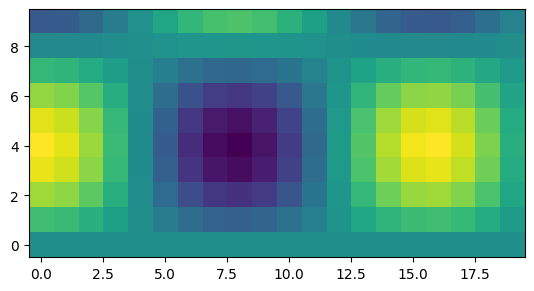

In [4]:
plot(a)

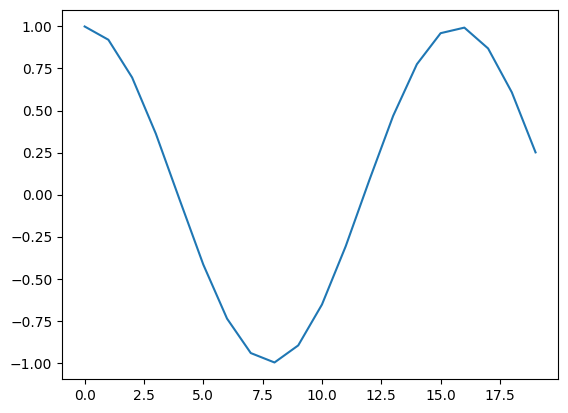

In [5]:
# Slice out row number 4
plot(a[4, :])

### We can't always deduce from the shape

In [6]:
ny, nx = 20, 20
a = np.sin(np.arange(ny) / (ny / 4)).reshape((-1, 1)) * np.cos(np.arange(nx) / (ny / 4))
a.shape

(20, 20)

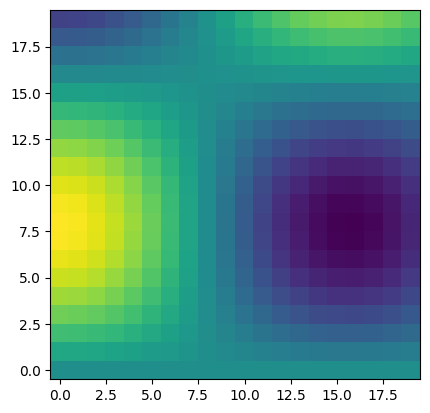

In [7]:
plot(a)

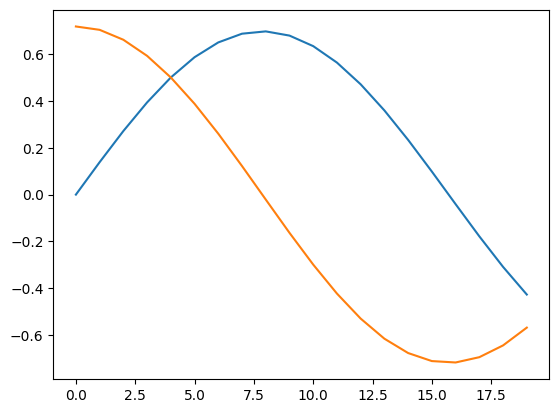

In [8]:
# Not always obvious which dimension is which
plot(a[:, 4], a[4, :])

### The situation gets worse with more dimensions

Say I now have an array that has 4 dimensions: `x, y, z, time` (in that order, maybe?)

In [9]:
a = np.random.random([20] * 4)
a.shape

(20, 20, 20, 20)

I want to get the first `z` slice...

Which one was it again?

In [10]:
z_slice = a[:, :, 0, :]  # x,y,z,t
z_slice = a[0, :, :, :]  # z,y,x,t
z_slice = a[:, :, :, 0]  # t,x,y,z

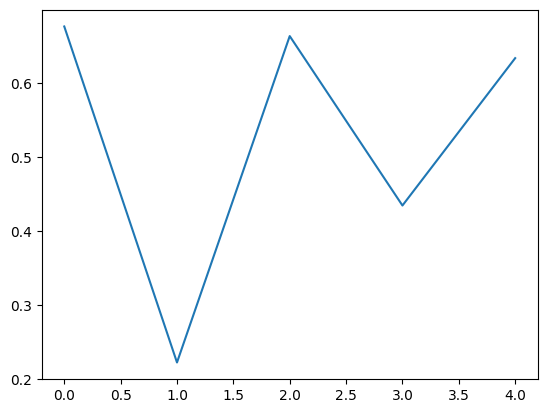

In [11]:
plot(a[:5, 3, 0, 0]) # Add quiz here

### Introducing labeled dimensions

<img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" width="220" /> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <img src="https://scipp.github.io/_static/logo-2022.svg" width="220" />

[Xarray](https://docs.xarray.dev/en/stable/index.html) (https://docs.xarray.dev) introduced labels to multi-dimensional Numpy arrays.

"*real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc.*"

We have embraced, and to a large extent copied, the Xarray mechanism.

**Let's add labels to the dimensions `x`, `y`, `z` and `t` of the multi-dimensional array `a`.**

In [12]:
# Try yourself
var = sc.array(dims=["x", "y", "z", "t"], values=a)
var

<scipp.Variable> (x: 20, y: 20, z: 20, t: 20)    float64  [dimensionless]  [0.910811, 0.950871, ..., 0.971193, 0.410102]

Getting the `z` slice is now easy and **readable**

In [13]:
# Try yourself
var["z", 0]

<scipp.Variable> (x: 20, y: 20, t: 20)    float64  [dimensionless]  [0.910811, 0.950871, ..., 0.749521, 0.587495]

### Adding coordinates

- Coordinates can be specified for each dimension.
- They describe the extent of each axis, as well as how far each data point is from its neighbours.

In [14]:
data = sc.array(dims=["space", "time"], values=rng.random((5, 24)))
sc.show(data)

In Scipp and Xarray, coordinates are added in a data structure called `DataArray`:

In [23]:
da = sc.DataArray(
    data=data,
    coords={
        "scipp-year": sc.array(dims=["time"], values=list(range(-20, 4))),
        "altitude": sc.linspace("space", 0, 80000, 5, unit='m')
    },
)
sc.show(da)

In [24]:
da

<scipp.DataArray>
Dimensions: Sizes[space:5, time:24, ]
Coordinates:
* altitude                  float64              [m]  (space)  [0, 20000, ..., 60000, 80000]
* scipp-year                  int64  [dimensionless]  (time)  [-20, -19, ..., 2, 3]
Data:
                            float64  [dimensionless]  (space, time)  [0.9767, 0.380196, ..., 0.127554, 0.95134]

## 2. Going further

<img src="https://scipp.github.io/_static/logo-2022.svg" width="220" />

### 2.1 Physical units

Every data variable and coordinate in Scipp has physical units.
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
(see also [pint](https://pint.readthedocs.io/en/stable/), [astropy.units](https://docs.astropy.org/en/stable/units/index.html), [pint-xarray](https://pint-xarray.readthedocs.io/en/stable/), ...)

### Using units for label-based indexing

We also use units to distinguish between positional indexing and label-based indexing:

In [25]:
image['x', 0.5 * sc.Unit('cm')].plot()

NameError: name 'image' is not defined

## Units and Coordinates Exercise 1

In [26]:
sc.show(da)
da

<scipp.DataArray>
Dimensions: Sizes[space:5, time:24, ]
Coordinates:
* altitude                  float64              [m]  (space)  [0, 20000, ..., 60000, 80000]
* scipp-year                  int64  [dimensionless]  (time)  [-20, -19, ..., 2, 3]
Data:
                            float64  [dimensionless]  (space, time)  [0.9767, 0.380196, ..., 0.127554, 0.95134]

In [27]:
da.coords['year'] = da.coords['scipp-year'] + 2020
sc.show(da)
da

<scipp.DataArray>
Dimensions: Sizes[space:5, time:24, ]
Coordinates:
* altitude                  float64              [m]  (space)  [0, 20000, ..., 60000, 80000]
* scipp-year                  int64  [dimensionless]  (time)  [-20, -19, ..., 2, 3]
* year                        int64  [dimensionless]  (time)  [2000, 2001, ..., 2022, 2023]
Data:
                            float64  [dimensionless]  (space, time)  [0.9767, 0.380196, ..., 0.127554, 0.95134]

In [28]:
da.coords['scipp-year']

<scipp.Variable> (time: 24)      int64  [dimensionless]  [-20, -19, ..., 2, 3]

In [41]:
def altitude_to_pressure(altitude):
    p_b = sc.scalar(1013.25, unit='hPa')
    return p_b*(sc.scalar(1) - altitude/sc.scalar(44307, unit='m'))**5  # **c

altitude_to_pressure(da.coords['altitude'])

<scipp.Variable> (space: 5)    float64          [100Pa]  [1013.25, 50.3514, ..., -5.64787, -343.772]

In [38]:
da.coords['altitude'] = sc.to_unit(da.coords['altitude'], 'm')

In [39]:
da

<scipp.DataArray>
Dimensions: Sizes[space:5, time:24, ]
Coordinates:
* altitude                  float64              [m]  (space)  [0, 20000, ..., 60000, 80000]
* scipp-year                  int64  [dimensionless]  (time)  [-20, -19, ..., 2, 3]
* year                        int64  [dimensionless]  (time)  [2000, 2001, ..., 2022, 2023]
Data:
                            float64  [dimensionless]  (space, time)  [0.9767, 0.380196, ..., 0.127554, 0.95134]

In [42]:
# Now let's assign the "pressure" coordinate...!
# Try it yourself.
da.coords['pressure'] = altitude_to_pressure(da.coords['altitude'])
da

<scipp.DataArray>
Dimensions: Sizes[space:5, time:24, ]
Coordinates:
* altitude                  float64              [m]  (space)  [0, 20000, ..., 60000, 80000]
* pressure                  float64          [100Pa]  (space)  [1013.25, 50.3514, ..., -5.64787, -343.772]
* scipp-year                  int64  [dimensionless]  (time)  [-20, -19, ..., 2, 3]
* year                        int64  [dimensionless]  (time)  [2000, 2001, ..., 2022, 2023]
Data:
                            float64  [dimensionless]  (space, time)  [0.9767, 0.380196, ..., 0.127554, 0.95134]

In [43]:
new_da = da.drop_coords(['altitude', 'scipp-year'])
new_da

<scipp.DataArray>
Dimensions: Sizes[space:5, time:24, ]
Coordinates:
* pressure                  float64          [100Pa]  (space)  [1013.25, 50.3514, ..., -5.64787, -343.772]
* year                        int64  [dimensionless]  (time)  [2000, 2001, ..., 2022, 2023]
Data:
                            float64  [dimensionless]  (space, time)  [0.9767, 0.380196, ..., 0.127554, 0.95134]

## Units and Coordinates Exercise 2

In [85]:
b_x = sc.array(dims=['row'], values=rng.normal(size=100000-200), unit='cm')
b_y = sc.array(dims=['row'], values=rng.normal(size=100000-200), unit='cm')

x1 = rng.random(size=100)*2 + 2
x2 = rng.random(size=100)*2 + 2
y1 = (np.sqrt(1 - (np.abs(x1-3)*2 - 1)**2))/3 - 2
y2 = (np.arccos(1-np.abs(x2-3)*2) - 3.14)/3 - 2
s_x = sc.array(dims=['row'], values = np.concatenate((x1, x2)), unit='cm')
s_y = sc.array(dims=['row'], values = np.concatenate((y1, y2)), unit='cm')

x = sc.concat([s_x, b_x], dim='row')
y = sc.concat([s_y, b_y], dim='row')

recording = sc.DataArray(data=sc.ones(sizes=x.sizes, unit='counts'),
                         coords={'x': x, 'y': y})

In [86]:
recording_time = sc.scalar(100000, unit='s')
recording_time

<scipp.Variable> ()      int64              [s]  100000

In [87]:
recording

<scipp.DataArray>
Dimensions: Sizes[row:100000, ]
Coordinates:
* x                         float64             [cm]  (row)  [2.3601, 3.19086, ..., 0.545259, -0.410966]
* y                         float64             [cm]  (row)  [-1.67998, -1.73801, ..., -0.852144, -0.165564]
Data:
                            float64         [counts]  (row)  [1, 1, ..., 1, 1]

# Let's convert cm to meter using sc.to_unit

In [73]:
recording.coords['x'] = sc.to_unit(recording.coords['x'], 'm')
recording.coords['y'] = sc.to_unit(recording.coords['y'], 'm')

In [88]:
recording

<scipp.DataArray>
Dimensions: Sizes[row:100000, ]
Coordinates:
* x                         float64             [cm]  (row)  [2.3601, 3.19086, ..., 0.545259, -0.410966]
* y                         float64             [cm]  (row)  [-1.67998, -1.73801, ..., -0.852144, -0.165564]
Data:
                            float64         [counts]  (row)  [1, 1, ..., 1, 1]

In [89]:
image = recording.hist(y=72, x=72)
image /= sc.scalar(100_000, unit='s')

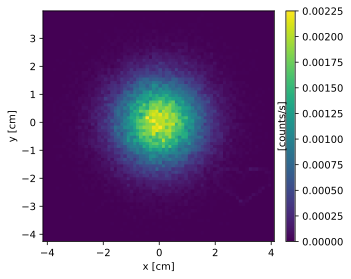

In [90]:
image.plot(aspect="equal")

In [91]:
b_integration_time = sc.scalar(50_000, unit='s')
b_x = sc.array(dims=['row'], values=rng.normal(size=50_000)/100, unit='m')
b_y = sc.array(dims=['row'], values=rng.normal(size=50_000)/100, unit='m')

background = sc.DataArray(data=sc.ones(sizes=b_x.sizes, unit='counts'),
                          coords={'x': b_x, 'y': b_y})
background

<scipp.DataArray>
Dimensions: Sizes[row:50000, ]
Coordinates:
* x                         float64              [m]  (row)  [-0.00773263, -0.00169645, ..., 0.00682739, 0.00386666]
* y                         float64              [m]  (row)  [-0.000458321, 0.0104237, ..., 0.000101357, -0.000168053]
Data:
                            float64         [counts]  (row)  [1, 1, ..., 1, 1]

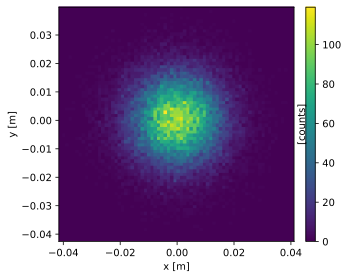

In [96]:
bg_image = background.hist(y=sc.to_unit(image.coords['y'], 'm'), x=sc.to_unit(image.coords['x'], 'm'))
bg_image.plot(aspect="equal")

### Units also provide protection

Say I now have a background image (dark frame) which I want to subtract from the signal image above,
but I forgot to first normalize it by integration time

In [100]:
image - bg_image  # You have to fix coordinate unit and data unit

UnitError: Cannot subtract counts/s and counts.

In [99]:
image.coords[''] = sc.to_unit(image.coords[''], '')
image.coords[''] = sc.to_unit(image.coords[''], '')

- The units are very useful in early prevention of difficult-to-spot bugs in a workflow.
- They save **hours** of debugging time, free-up mental capacity and let the user focus on the important thing: **doing science**.

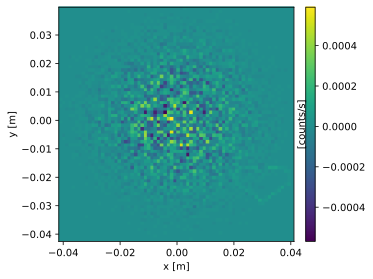

In [102]:
# Try it your self
(image - bg_image/b_integration_time).plot(aspect="equal")

### 2.2 Bin-edge coordinates

- It is sometimes necessary to have coordinates that represent a range for each data value.
- E.g. "the temperature was 310 K in the time span between 10 and 20 seconds".
- This also arises every time we histogram data, as in the image above.
- Scipp supports this by having **bin-edge coordinates**: a coordinate which has a length of 1 more than the dimension length.

In [104]:
image = recording.hist(y=8, x=8)
sc.show(image)

In [105]:
image

<scipp.DataArray>
Dimensions: Sizes[y:8, x:8, ]
Coordinates:
* x                         float64             [cm]  (x [bin-edge])  [-4.15481, -3.12152, ..., 3.07827, 4.11156]
* y                         float64             [cm]  (y [bin-edge])  [-4.26099, -3.23113, ..., 2.94799, 3.97785]
Data:
                            float64         [counts]  (y, x)  [1, 0, ..., 2, 0]

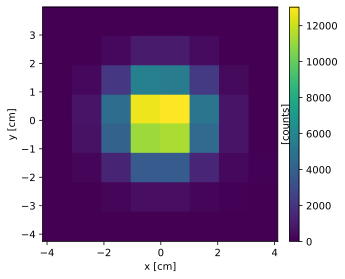

In [106]:
image.plot(aspect='equal')

- Numpy and Matplotlib return the bin edges and the data counts separately
- We have everything stored inside a single data structure

## 3. Binned data

Scipp distinguishes **histogrammed** data from **binned** data:

- Histogrammed data refers to regular dense arrays of, e.g., floating-point values with an associated bin-edge coordinate.
- Binned data refers to the precursor of histogrammed data, i.e., each bin contains a “list” of contributing events or values. Binned data can be converted into a histogram by computing the sum over all events or values in a bin.

This is conceptually similar to a multi-dimensional <a href="https://awkward-array.org/doc/main/"><img src="https://iris-hep.org/assets/logos/awkward.svg" width="200" /></a>.

It is best illustrated with an example of data analysis.
For this, we will use one of the NYC taxi datasets.

### NYC yellow taxi dataset

<img src="https://vaex.readthedocs.io/en/latest/_images/datasets_2_1.png" /> <img src="https://cdn-images-1.medium.com/v2/resize:fit:2680/1*fqrY2h4uLD3eKEvJ6hlI2g.png" width="600" />

(https://vaex.readthedocs.io/en/latest/datasets.html, Dataset from 2015, obtained as a HDF5 file from the Vaex docs,
and subsequently cleaned of outliers).

In [3]:
# %matplotlib widget

da = sc.io.load_hdf5('nyc_taxi_data_2015.h5')
da

<scipp.DataArray>
Dimensions: Sizes[row:71357470, ]
Coordinates:
* fare_amount               float64              [$]  (row)  [5, 12, ..., 13.5, 13.5]
* hour                        int64  [dimensionless]  (row)  [2, 19, ..., 0, 0]
* latitude                  float64            [deg]  (row)  [40.7429, 40.7506, ..., 40.6933, 40.7606]
* longitude                 float64            [deg]  (row)  [-73.9965, -73.9748, ..., -73.9887, -73.991]
* trip_distance             float64             [mi]  (row)  [1.09, 1.59, ..., 3.8, 1.06]
Data:
                            float64         [counts]  (row)  [1, 1, ..., 1, 1]

<Axes: >

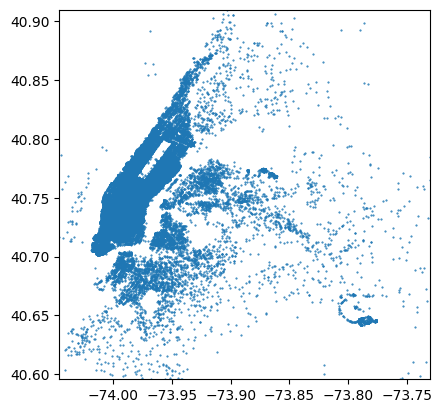

In [4]:
n = 1000
x = da.coords["longitude"].values[::n]
y = da.coords["latitude"].values[::n]
scatter(x, y)

### Binning the data records

- Working with binned data is most efficient when keeping the number of bins relatively low.
- Binning is essentially like overlaying a grid of bin edges onto our data

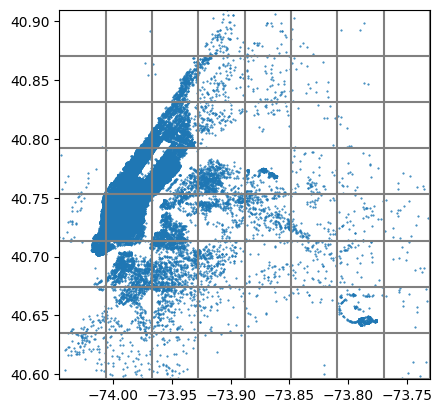

In [5]:
ax = scatter(x, y)
for lon in np.linspace(*ax.get_xlim(), 9):
    ax.axvline(lon, color="gray")
for lat in np.linspace(*ax.get_ylim(), 9):
    ax.axhline(lat, color="gray")

In [6]:
# Bin into 8 longitude & latitude bins
binned = da.bin(latitude=8, longitude=8)
binned

<scipp.DataArray>
Dimensions: Sizes[latitude:8, longitude:8, ]
Coordinates:
* latitude                  float64            [deg]  (latitude [bin-edge])  [40.595, 40.635, ..., 40.875, 40.915]
* longitude                 float64            [deg]  (longitude [bin-edge])  [-74.05, -74.01, ..., -73.77, -73.73]
Data:
                          DataArrayView        <no unit>  (latitude, longitude)  binned data: dim='row', content=DataArray(
          dims=(row: 71357470),
          data=float64[counts],
          coords={'fare_amount':float64[$], 'trip_distance':float64[mi],
                  'latitude':float64[deg], 'longitude':float64[deg], 'hour':int64[dimensionless]})

In [ ]:
# Bin into 8 longitude & latitude bins
# Try it yourself:
binned = da.bin(latitude=, longitude=)
binned

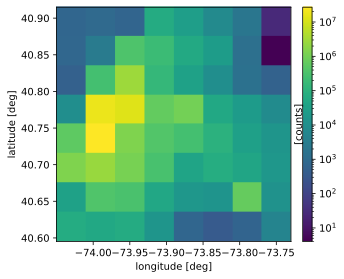

In [7]:
# Histogramming is summing all the counts in each bin
binned.hist().plot(aspect="equal", norm="log")

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>


### Selecting/slicing bins

- Binning *groups* the data into bins, but keeps the underlying table of records beneath
- **No information is lost, it is simply re-ordered**
- The bins can then be used for slicing the data, providing extremely efficient data selection and filtering

In [8]:
manh = binned["longitude", 1]["latitude", 4]
manh

<scipp.DataArray>
Dimensions: Sizes[]
Coordinates:
  latitude                  float64            [deg]  (latitude [bin-edge])  [40.755, 40.795]
  longitude                 float64            [deg]  (longitude [bin-edge])  [-74.01, -73.97]
Data:
                          DataArrayView        <no unit>  ()  binned data: dim='row', content=DataArray(
          dims=(row: 71357470),
          data=float64[counts],
          coords={'fare_amount':float64[$], 'trip_distance':float64[mi],
                  'latitude':float64[deg], 'longitude':float64[deg], 'hour':int64[dimensionless]})

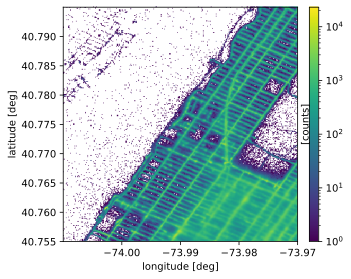

In [9]:
# We can now histogram this with a much finer resolution

manh.hist(latitude=300, longitude=300).plot(norm="log", aspect="equal")

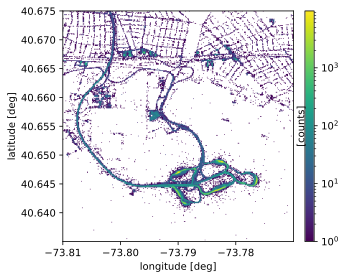

In [10]:
# We select another bin, which contains the JFK airport

jfk = binned["longitude", 6]["latitude", 1]
jfk.hist(latitude=300, longitude=300).plot(norm="log", aspect="equal")

![jfk](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/JFK_airport_terminal_map.png/640px-JFK_airport_terminal_map.png)

(https://commons.wikimedia.org/wiki/File:JFK_airport_terminal_map.png)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Binning into a new dimension

- Data that has already been binned can also be binned further into new dimensions

In [11]:
manh

<scipp.DataArray>
Dimensions: Sizes[]
Coordinates:
  latitude                  float64            [deg]  (latitude [bin-edge])  [40.755, 40.795]
  longitude                 float64            [deg]  (longitude [bin-edge])  [-74.01, -73.97]
Data:
                          DataArrayView        <no unit>  ()  binned data: dim='row', content=DataArray(
          dims=(row: 71357470),
          data=float64[counts],
          coords={'fare_amount':float64[$], 'trip_distance':float64[mi],
                  'latitude':float64[deg], 'longitude':float64[deg], 'hour':int64[dimensionless]})

- we look at the trip distances inside the Manhattan and JFK bins we have selected above.

In [12]:
# Use 100 distance bins
manh_dist = manh.bin(trip_distance=100)
manh_dist

<scipp.DataArray>
Dimensions: Sizes[trip_distance:100, ]
Coordinates:
  latitude                  float64            [deg]  (latitude [bin-edge])  [40.755, 40.795]
  longitude                 float64            [deg]  (longitude [bin-edge])  [-74.01, -73.97]
* trip_distance             float64             [mi]  (trip_distance [bin-edge])  [0.02, 0.7866, ..., 75.9134, 76.68]
Data:
                          DataArrayView        <no unit>  (trip_distance)  binned data: dim='row', content=DataArray(
          dims=(row: 16849082),
          data=float64[counts],
          coords={'fare_amount':float64[$], 'trip_distance':float64[mi],
                  'latitude':float64[deg], 'longitude':float64[deg], 'hour':int64[dimensionless]})

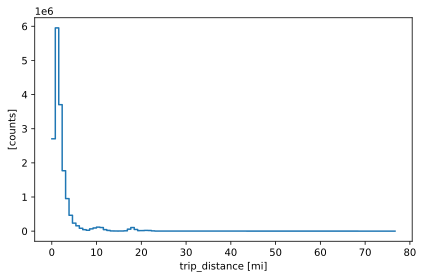

In [13]:
manh_dist.hist().plot()

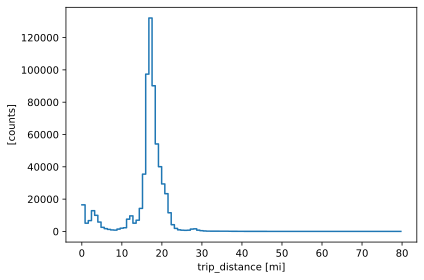

In [14]:
jfk_dist = jfk.bin(trip_distance=100)
jfk_dist.hist().plot()

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Precise bin-edges

- Data can be binned within the specific bin-edges instead of the auto-calculated bin-edges based on the number of bins.

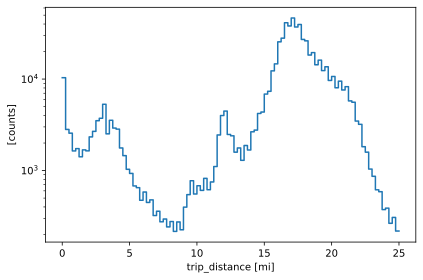

In [29]:
# Make 100 bins between 0 and 25 miles.
nbins = 100
trip_bins = sc.linspace('trip_distance', 0, 25, nbins + 1, unit='mi')

# Bin & plot our data
jfk_dist.bin(trip_distance=trip_bins).hist().transpose().plot(norm="log")

In [44]:
jfk_dist.bin(trip_distance=trip_bins)

<scipp.DataArray>
Dimensions: Sizes[trip_distance:100, ]
Coordinates:
  latitude                  float64            [deg]  (latitude [bin-edge])  [40.635, 40.675]
  longitude                 float64            [deg]  (longitude [bin-edge])  [-73.81, -73.77]
* trip_distance             float64             [mi]  (trip_distance [bin-edge])  [0, 0.25, ..., 24.75, 25]
Data:
                          DataArrayView        <no unit>  (trip_distance)  binned data: dim='row', content=DataArray(
          dims=(row: 634034),
          data=float64[counts],
          coords={'fare_amount':float64[$], 'trip_distance':float64[mi],
                  'latitude':float64[deg], 'longitude':float64[deg], 'hour':int64[dimensionless]})

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>


### Other operations on bins: what is the fare amount as a function of distance?

- In addition to summing/histogramming, bins can be used for other reduction operations: `min()`, `max()`, and `mean()`.

In [15]:
manh_dist

<scipp.DataArray>
Dimensions: Sizes[trip_distance:100, ]
Coordinates:
  latitude                  float64            [deg]  (latitude [bin-edge])  [40.755, 40.795]
  longitude                 float64            [deg]  (longitude [bin-edge])  [-74.01, -73.97]
* trip_distance             float64             [mi]  (trip_distance [bin-edge])  [0.02, 0.7866, ..., 75.9134, 76.68]
Data:
                          DataArrayView        <no unit>  (trip_distance)  binned data: dim='row', content=DataArray(
          dims=(row: 16849082),
          data=float64[counts],
          coords={'fare_amount':float64[$], 'trip_distance':float64[mi],
                  'latitude':float64[deg], 'longitude':float64[deg], 'hour':int64[dimensionless]})

- To get the minimum and maximum fares for all trips that ended inside our Manhattan area, we can do

In [16]:
manh_dist.bins.coords['fare_amount'].min(), manh.bins.coords['fare_amount'].max()

(<scipp.Variable> ()    float64              [$]  -242.25,
 <scipp.Variable> ()    float64              [$]  7002)

- These values are somewhat strange, indicative of bad data in the table.
- We restrict our fare range from \\$0 to \\$200.

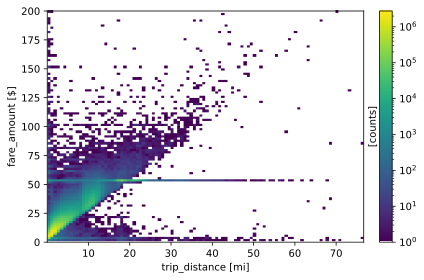

In [17]:
# Make 100 bins between 0 and 200 dollars
nbins = 100
fare_bins = sc.linspace('fare_amount', 0, 200, nbins + 1, unit='dollar')

# Bin & plot our data
manh_dist.bin(fare_amount=fare_bins).hist().transpose().plot(norm="log")

Some things we can say about the data:

- there appears to be a (somewhat expected) correlation between fare amount and trip distance: the further you go, the more you'll have to pay
- for a given trip distance, clients usually pay above the diagonal line, rarely below
- there appears to be a magic fare amount of \\$52 that will take you anywhere from 0 to 60 miles!

<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>


## 4. Plopp: interactive data visualization tools

<img src="https://scipp.github.io/plopp/_static/logo.svg" width="200" />

https://scipp.github.io/plopp 

In [ ]:
import plopp as pp

fare_lat_lon = da.hist(fare_amount=fare_bins, latitude=300, longitude=300)
fare_lat_lon

In [ ]:
pp.inspector(fare_lat_lon, dim='fare_amount', norm='log')

# Final Exercise

Let's draw 2 plots, 1 for region A, another one for region B
with each week day's taxi-fare histogram

In [1]:
from quizes import Test

t = Test()
t

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<a href="https://scipp.github.io"><img src="https://scipp.github.io/_static/logo-2022.svg" width="600" /></a>

# Thank you for listening! &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <img src="https://img.icons8.com/?size=512&id=24511&format=png" width="50" /> [scipp.github.io](https://scipp.github.io) &nbsp;&nbsp;&nbsp;&nbsp; <img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" width="50" /> [github.com/scipp](https://github.com/scipp)

<br>

<h1 style="color:#C70039;">We are hiring! Permanent position as a software engineer for science tools</h1> 

<br>

## Neil Vaytet &nbsp;&nbsp;&nbsp;&nbsp; <a href="mailto:neil.vaytet@ess.eu">neil.vaytet@ess.eu</a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <img src="neil.png" width="100" /> &nbsp; <img src="https://europeanspallationsource.se/themes/custom/ess/logo.svg" width="200" />

<br>

<h3>
    <img src="simon.png" width="60" /> Simon Heybrock &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    <img src="janlukas.png" width="60" />Jan-Lukas Wynen &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    <img src="sunyoung.png" width="60" />Sunyoung Yoo
</h3>


<!-- <br>

# Links:

## &bull; Docs: [scipp.github.io](https://scipp.github.io)

## &bull; Github: [github.com/scipp/scipp](https://github.com/scipp/scipp)

## &bull; Plopp: [github.com/scipp/plopp](https://github.com/scipp/plopp) -->

<br>

